<h1><center>Laboratorio 9:  ¿Superhéroe o Villano?  🦴</center></h1>

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos</strong></center>

### Cuerpo Docente:

- Profesor: Pablo Badilla y Ignacio Meza
- Auxiliar: Sebastián Tinoco
- Ayudante: Felipe Arias y Diego Cortez

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Nombre de alumno 1: Juan Chinchon
- Nombre de alumno 2: Stefano Pinto


### **Link de repositorio de GitHub:** `https://github.com/jchinchon/MDS7021-Laboratorio-de-Programacion-Cientifica-Labs-`

## Temas a tratar

- Codificación de texto usando Bag of Words.
- Búsqueda del modelo óptimo de clasificación usando `GridSearch`
- Uso de pipelines.

## Reglas:

- **Grupos de 2 personas**
- Asistencia **obligatoria** a instrucciones del lab (viernes 16.15). Luego, pueden quedarse trabajando en las salas o irse.
- **No se revisarán entregas de personas ausentes**. 
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Prohibidas las copias. 
- Pueden usar cualquer material del curso que estimen conveniente.

### Objetivos principales del laboratorio

- Obtener caracteristicas a partir de texto usando `CountVectorizer`.
- Fijar un pipeline con un modelo base que luego se irá optimizando.
- Comprender como realizar una búsqueda de grilla sobre un conjunto de clasificadores e hiperparámetros usando `GridSearch`.

El laboratorio deberá ser desarrollado sin el uso indiscriminado de iteradores nativos de python (aka "for", "while"). La idea es que aprendan a exprimir al máximo las funciones optimizadas que nos entrega `pandas`, las cuales vale mencionar, son bastante más eficientes que los iteradores nativos sobre DataFrames.

#Importamos librerias utiles 😸

In [8]:
# Librería Core del lab.
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split 

# Pre-procesamiento
from sklearn.feature_selection import SelectPercentile, f_classif
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import CountVectorizer

# Clasifación
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Metricas de evaluación
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score

# Librería para plotear
#!pip install --upgrade plotly
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Proyecciones en baja dimensionalidad: UMAP
#!pip install umap-learn

# Librería para NLP
#!pip install nltk
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize  
from nltk.stem import PorterStemmer
nltk.download('stopwords')

#EDA
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jigna\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# 1. ¿Quien es Bat Cow?

<p align="center">
  <img src="https://i.imgur.com/D9f1RHy.jpg" width="350">
</p>

En vez de estar desarrollando las evaluaciones correspondientes a su curso, su profesor de catedra y su auxiliar discuten acerca la alineación (héroe o villano) del personaje de ficción Bat-Cow. 

El cuerpo docente, no logra ponerse de acuerdo si el personaje es bueno, neutral o malo: el auxiliar plantea que Bat-cow posee una siniestra mirada, intrigante pero común característica de los personajes malvados. 
Por otra parte, extendiendo las ideas de Rousseau, el profesor plantea que tal como los humanos no nacen malos, no existe motivo por el cual una vaca con superpoderes deba serlo.

Sin embargo, ambos concuerdan que es difícil estimar la alineación solo usando los atributos físicos, por lo que creen el análisis debe ser complementado aún más antes de comunicarle los resultados a su estudiantado. Buscando más información, ambos sujetos se percatan de la existencia de un excelente antecedente para estimar la alineación: la historia personal de cada superhéroe o villano.

Es por esto le solicitan que construya y optimice un clasificador basado en texto el cual analice la alineación de cada personaje basado en su historia personal.

Para este laboratorio deben trabajar con los datos `df_comics.csv` y `comics_no_label.csv` subidos a u-cursos. El primero es un conjunto de datos que les servirá para entrenar un modelo de clasificación, mientras que el segundo es un dataset con personajes de ficción no etiquetados a predecir (sí, aquí está la misteriosa Batcow).

Para comenzar cargue los dataset señalados y visualice a través de un head los atributos que poseen cada uno de los dataset.


In [9]:
# Si usted está utilizando Colaboratory le puede ser útil este código para cargar los archivos.
try:
    from google.colab import drive
    drive.mount("/content/drive")
    path = 'Dirección donde tiene los archivos en el Drive'
except: 
    print('Ignorando conexión drive-colab')

Ignorando conexión drive-colab


In [10]:
df_comics = pd.read_csv('df_comics.csv')
df_comics_no_label = pd.read_csv('comics_no_label.csv')
df_comics = df_comics.dropna(subset=['history_text']) # eliminar ejemplos sin historia

In [11]:
# queda a labor de su equipo hacer el análisis exploratorio
df_comics.head()

,Unnamed: 0,name,real_name,full_name,overall_score,history_text,powers_text,intelligence_score,strength_score,speed_score,durability_score,power_score,combat_score,superpowers,alter_egos,aliases,place_of_birth,first_appearance,creator,alignment,occupation,base,teams,relatives,gender,type_race,height,weight,eye_color,hair_color,skin_color,img,has_electrokinesis,has_energy_constructs,has_mind_control_resistance,has_matter_manipulation,has_telepathy_resistance,has_mind_control,has_enhanced_hearing,has_dimensional_travel,has_element_control,has_size_changing,has_fire_resistance,has_fire_control,has_dexterity,has_reality_warping,has_illusions,has_energy_beams,has_peak_human_condition,has_shapeshifting,has_heat_resistance,has_jump,has_self-sustenance,has_energy_absorption,has_cold_resistance,has_magic,has_telekinesis,has_toxin_and_disease_resistance,has_telepathy,has_regeneration,has_immortality,has_teleportation,has_force_fields,has_energy_manipulation,has_endurance,has_longevity,has_weapon-based_powers,has_energy_blasts,has_enhanced_senses,has_invulnerability,has_stealth,has_marksmanship,has_flight,has_accelerated_healing,has_weapons_master,has_intelligence,has_reflexes,has_super_speed,has_durability,has_stamina,has_agility,has_super_strength
0,0,3-D Man,"Delroy Garrett, Jr.","Delroy Garrett, Jr.",6,"Delroy Garrett, Jr. grew up to become a track ...",NaN,85,30,60,60,40,70,"['Super Speed', 'Super Strength']",[],[''],NaN,NaN,Marvel Comics,Good,NaN,NaN,"['Annihilators', 'Asgardians', 'Avengers', 'Ne...",NaN,Male,Human,-,-,NaN,NaN,NaN,/pictures2/portraits/11/050/10038.jpg?v=156096...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,2,A-Bomb,Richard Milhouse Jones,Richard Milhouse Jones,20,"Richard ""Rick"" Jones was orphaned at a young ...","On rare occasions, and through unusual circu...",80,100,80,100,100,80,"['Accelerated Healing', 'Agility', 'Berserk Mo...",[],['Rick Jones'],"Scarsdale, Arizona","Hulk Vol 2 #2 (April, 2008) (as A-Bomb)",Marvel Comics,Good,"Musician, adventurer, author; formerly talk sh...",NaN,"['Teen Brigade', 'Ultimate Fantastic Four', 'U...",Marlo Chandler-Jones (wife); Polly (aunt); Mrs...,Male,Human,6'8 • 203 cm,980 lb • 441 kg,Yellow,No Hair,NaN,/pictures2/portraits/10/050/10060.jpg?v=158233...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
2,3,Aa,Aa,NaN,12,Aa is one of the more passive members of the P...,NaN,80,50,55,45,100,55,"['Energy Absorption', 'Energy Armor', 'Energy ...",[],[''],Stoneworld,Green Lantern Vol 3 #21,DC Comics,Good,NaN,NaN,"['Blue Lantern Corps', 'Green Lantern Corps', ...",NaN,Male,Human,-,-,NaN,NaN,NaN,/pictures2/portraits/10/050/1410.jpg?v=1581168103,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,Aaron Cash,Aaron Cash,Aaron Cash,5,Aaron Cash is the head of security at Arkham A...,NaN,80,10,25,40,30,50,"['Weapon-based Powers', 'Weapons Master']",[],[''],Gotham City,NaN,DC Comics,Good,NaN,NaN,[],NaN,Male,Human,-,-,NaN,NaN,NaN,/pictures2/portraits/11/050/11650.jpg?v=156173...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,Aayla Secura,Aayla Secura,NaN,8,ayla Secura was a Rutian Twi'lek Jedi Knight (...,NaN,90,40,45,55,55,85,"['Accelerated Healing', 'Agility', 'Astral Pro...",[],[''],NaN,NaN,George Lucas,Good,NaN,NaN,['Jedi Order'],NaN,Female,Twi'lek,-,-,NaN,NaN,NaN,/pictures2/portraits/11/050/10891.jpg?v=156181...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

In [12]:
#Analisis Exploratorio
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)
def EDA(df):
    print('1.- El DataFrame tiene {i} filas y {j} columnas \n'.format(i = str(df.shape[0]),j = str(df.shape[1])))
    print('2.- El DataFrame esta compuesto por las siguientes columnas: \n'+str(list(df.columns))+' \n')
    print('3.- Descripción numérica del Dataframe:')
    display(df.describe().T)
    print('4.- Cantidad de valores nulos por columna:')
    print(df.isna().sum())
    print('5.- Tipo de datos por columna:')
    print(df.dtypes)

In [13]:
EDA(df_comics)

1.- El DataFrame tiene 1285 filas y 82 columnas 

2.- El DataFrame esta compuesto por las siguientes columnas: 
['Unnamed: 0', 'name', 'real_name', 'full_name', 'overall_score', 'history_text', 'powers_text', 'intelligence_score', 'strength_score', 'speed_score', 'durability_score', 'power_score', 'combat_score', 'superpowers', 'alter_egos', 'aliases', 'place_of_birth', 'first_appearance', 'creator', 'alignment', 'occupation', 'base', 'teams', 'relatives', 'gender', 'type_race', 'height', 'weight', 'eye_color', 'hair_color', 'skin_color', 'img', 'has_electrokinesis', 'has_energy_constructs', 'has_mind_control_resistance', 'has_matter_manipulation', 'has_telepathy_resistance', 'has_mind_control', 'has_enhanced_hearing', 'has_dimensional_travel', 'has_element_control', 'has_size_changing', 'has_fire_resistance', 'has_fire_control', 'has_dexterity', 'has_reality_warping', 'has_illusions', 'has_energy_beams', 'has_peak_human_condition', 'has_shapeshifting', 'has_heat_resistance', 'has_jump

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1285.0,727.744747,415.297480,0.0,372.0,728.0,1084.0,1449.0
intelligence_score,1285.0,78.665370,25.074439,0.0,75.0,85.0,95.0,100.0
strength_score,1285.0,38.832685,34.220845,0.0,10.0,30.0,65.0,100.0
speed_score,1285.0,45.898833,29.176614,0.0,25.0,40.0,65.0,100.0
durability_score,1285.0,55.610895,31.683003,0.0,30.0,55.0,85.0,100.0
power_score,1285.0,66.556420,33.329484,0.0,40.0,70.0,100.0,100.0
combat_score,1285.0,67.805447,29.598315,0.0,55.0,75.0,90.0,100.0
has_electrokinesis,1228.0,0.089577,0.285690,0.0,0.0,0.0,0.0,1.0
has_energy_constructs,1228.0,0.074919,0.263367,0.0,0.0,0.0,0.0,1.0
has_mind_control_resistance,1228.0,0.074104,0.262047,0.0,0.0,0.0,0.0,1.0


4.- Cantidad de valores nulos por columna:
Unnamed: 0                             0
name                                   0
real_name                            121
full_name                            391
overall_score                          0
history_text                           0
powers_text                          326
intelligence_score                     0
strength_score                         0
speed_score                            0
durability_score                       0
power_score                            0
combat_score                           0
superpowers                            0
alter_egos                             0
aliases                                0
place_of_birth                       551
first_appearance                     143
creator                              119
alignment                              0
occupation                           347
base                                 479
teams                                  0
relatives     

alignment
Good       743
Bad        429
Neutral    113
Name: count, dtype: int64


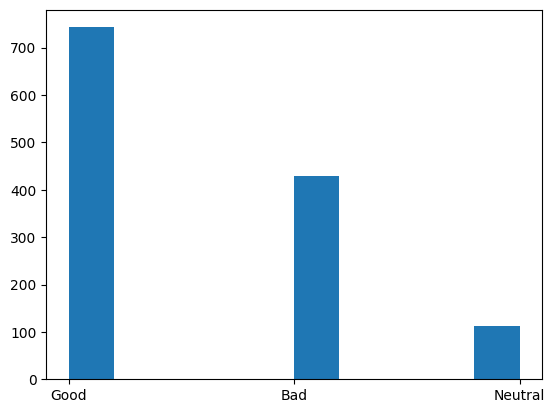

In [14]:
#Gráfico de frecuencia de la variable target. -> alignment
print(df_comics['alignment'].value_counts())
plt.hist(df_comics['alignment'])
plt.show()

In [15]:
#Vista de variables categóricas
df_comics.select_dtypes(include=['category', 'object']).head(3)

,name,real_name,full_name,overall_score,history_text,powers_text,superpowers,alter_egos,aliases,place_of_birth,first_appearance,creator,alignment,occupation,base,teams,relatives,gender,type_race,height,weight,eye_color,hair_color,skin_color,img
0,3-D Man,"Delroy Garrett, Jr.","Delroy Garrett, Jr.",6,"Delroy Garrett, Jr. grew up to become a track ...",NaN,"['Super Speed', 'Super Strength']",[],[''],NaN,NaN,Marvel Comics,Good,NaN,NaN,"['Annihilators', 'Asgardians', 'Avengers', 'Ne...",NaN,Male,Human,-,-,NaN,NaN,NaN,/pictures2/portraits/11/050/10038.jpg?v=156096...
1,A-Bomb,Richard Milhouse Jones,Richard Milhouse Jones,20,"Richard ""Rick"" Jones was orphaned at a young ...","On rare occasions, and through unusual circu...","['Accelerated Healing', 'Agility', 'Berserk Mo...",[],['Rick Jones'],"Scarsdale, Arizona","Hulk Vol 2 #2 (April, 2008) (as A-Bomb)",Marvel Comics,Good,"Musician, adventurer, author; formerly talk sh...",NaN,"['Teen Brigade', 'Ultimate Fantastic Four', 'U...",Marlo Chandler-Jones (wife); Polly (aunt); Mrs...,Male,Human,6'8 • 203 cm,980 lb • 441 kg,Yellow,No Hair,NaN,/pictures2/portraits/10/050/10060.jpg?v=158233...
2,Aa,Aa,NaN,12,Aa is one of the more passive members of the P...,NaN,"['Energy Absorption', 'Energy Armor', 'Energy ...",[],[''],Stoneworld,Green Lantern Vol 3 #21,DC Comics,Good,NaN,NaN,"['Blue Lantern Corps', 'Green Lantern Corps', ...",NaN,Male,Human,-,-,NaN,NaN,NaN,/pictures2/portraits/10/050/1410.jpg?v=1581168103


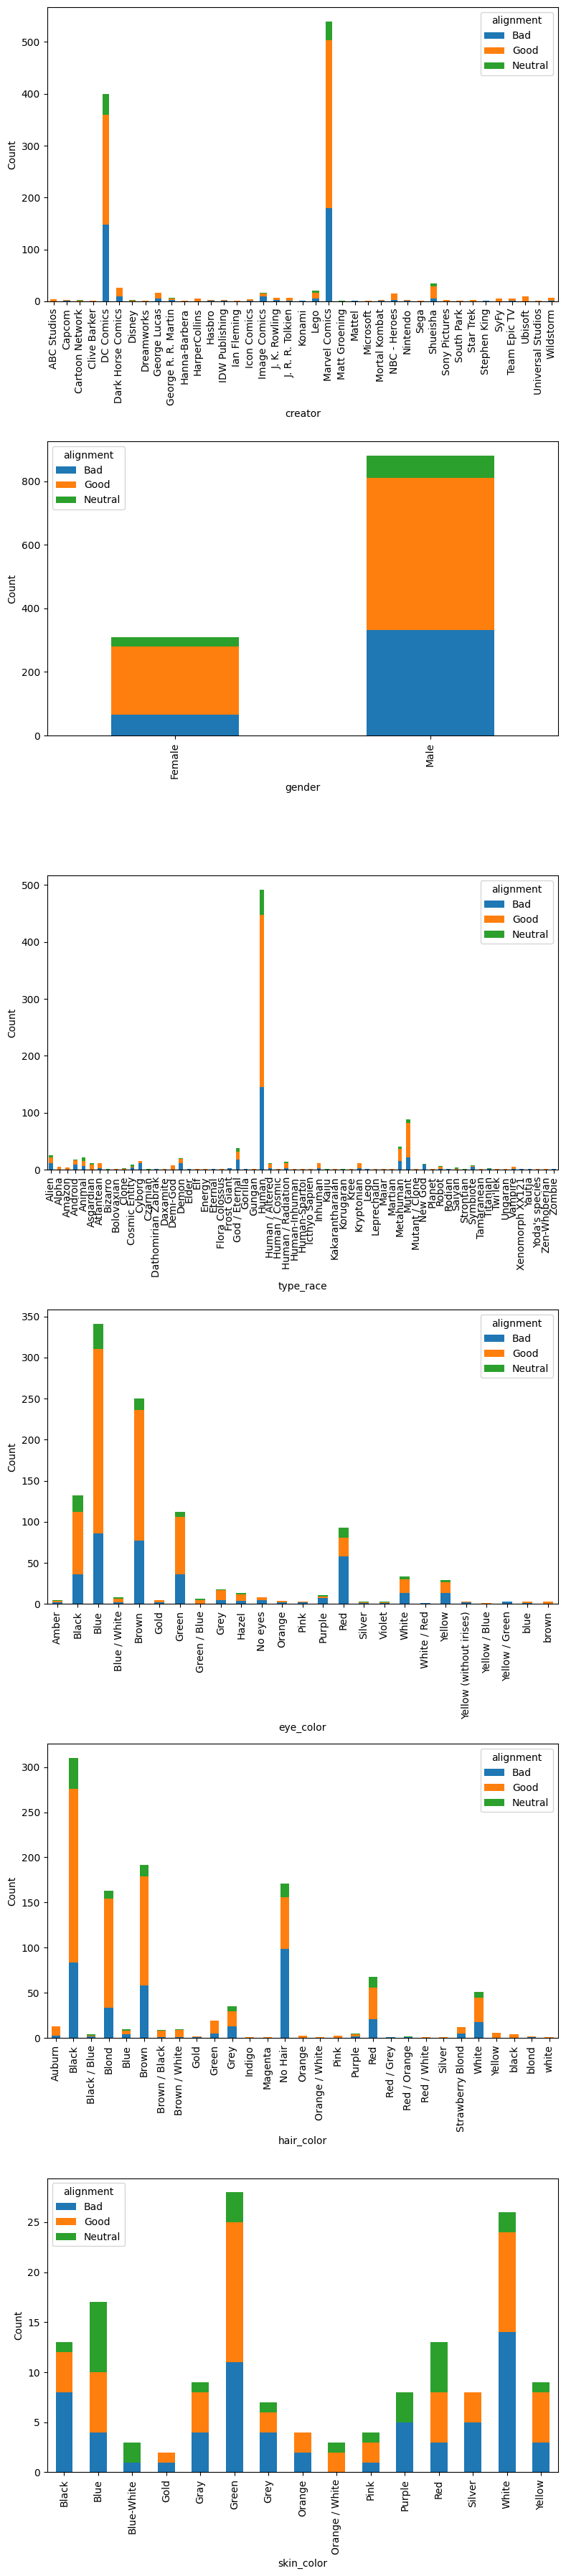

In [16]:
#Variables categóricas. (selección manual)
variables_cat = ['creator', 'gender', 'type_race', 'eye_color', 'hair_color', 'skin_color']
target_variable = 'alignment'

#Calculo de frecuencias
category_counts = {}
for variable in variables_cat:
    category_counts[variable] = df_comics.groupby([variable, target_variable]).size().unstack()

#Tamaño de los subplots
fig, axs = plt.subplots(len(variables_cat), 1, figsize=(8, 6 * len(variables_cat)))

# Graficar frecuencias
for i, variable in enumerate(variables_cat):
    ax = axs[i]
    category_counts[variable].plot(kind='bar', stacked=True, ax=ax)
    ax.set_xlabel(variable)
    ax.set_ylabel('Count')
    ax.legend(title=target_variable)

plt.tight_layout()
plt.show()

Se observa que la mayoría de personajes son de DC y Marvel, principalmente son hombres humanos de ojos negros. La distribución de la variable objetivo indica que la mayoría de los personajes son buenos, alrrededor de 1/3 son malos y la etiqueta neutral son minoría.

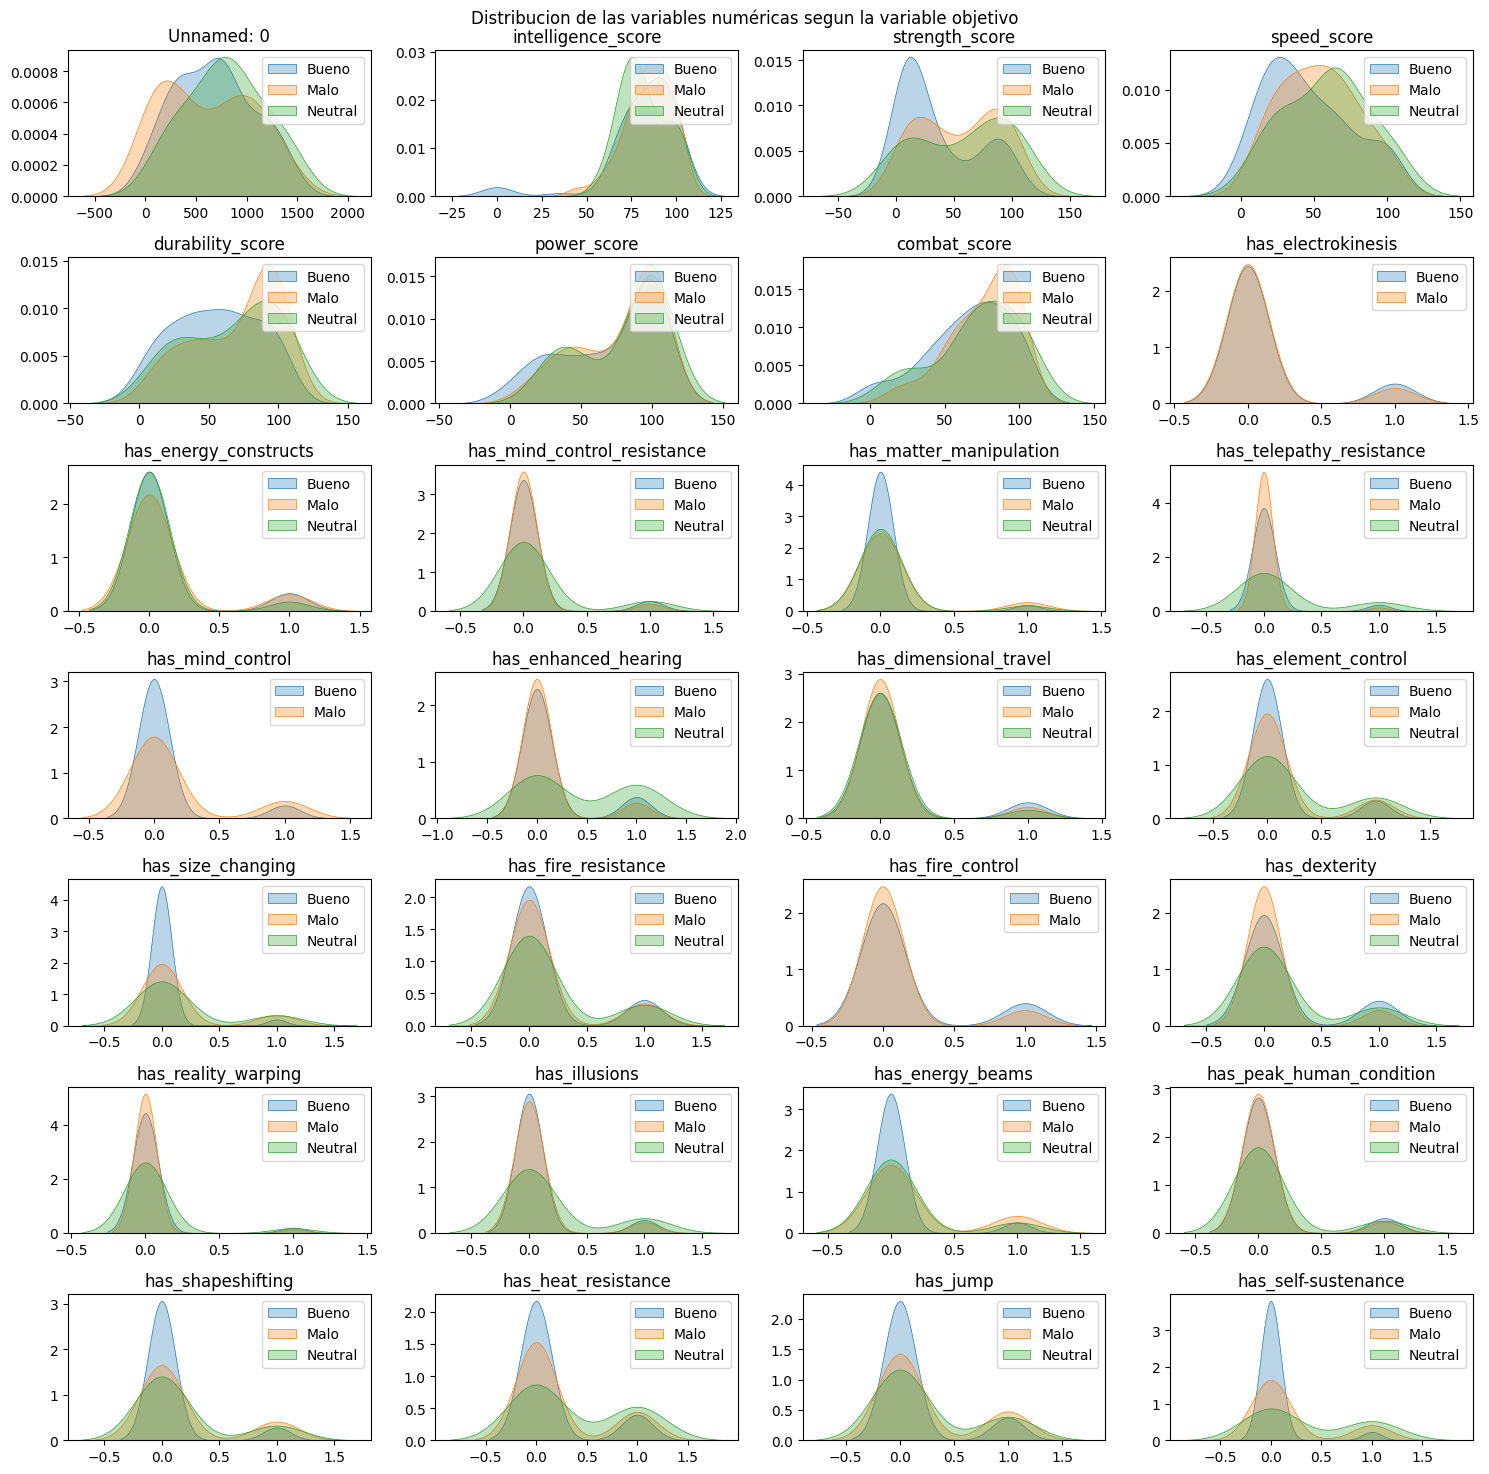

In [17]:
#Variables numéricas
#desactivar warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=UserWarning, module='matplotlib.font_manager')

variables_num = df_comics.select_dtypes(include=[np.number]).columns.tolist()

#se usará el 10% de los datos para graficar
aux = df_comics.sample(frac=0.1, random_state=123)

# Boxplots
fig, axes = plt.subplots(nrows=7, ncols=4, figsize=(15, 15), sharex=False, sharey=False)
axes = axes.ravel()  # array to 1D

#columnas igual a las numericas + target
cols = variables_num + ['alignment']

fig.suptitle('Distribucion de las variables numéricas segun la variable objetivo')

for col, ax in zip(cols, axes):
    if col != 'alignment':
        sns.kdeplot(data=aux.loc[aux['alignment']=='Good', col], ax=ax, fill=True, alpha=.3, linewidth=0.5, label='Bueno')
        sns.kdeplot(data=aux.loc[aux['alignment']=='Bad', col], ax=ax, fill=True, alpha=.3, linewidth=0.5, label='Malo')
        sns.kdeplot(data=aux.loc[aux['alignment']=='Neutral', col], ax=ax, fill=True, alpha=.3, linewidth=0.5, label='Neutral')
        ax.set(title=f'{col}', xlabel=None, ylabel=None)
        ax.legend()
    else:
        pass
fig.tight_layout()
plt.show()

Se aprecian concentraciones en los valores 0 y 1, por que realmente muchas de estas variables son del tipo dummy a pesar de estar categorizadas como numéricas.

## 1.1 Obtención de Features y Bag of Words

<p align="center">
  <img src="https://media0.giphy.com/media/eIUpSyzwGp0YhAMTKr/200.gif" width="300">
</p>

Primero que todo, deben obtener un vector de características del atributo `history_text`, utilizando `Bag of Words`. En este atributo se presenta una breve descripción de la historia de cada uno de los personajes de ficción presentes en el dataset. 

Pero... antes de empezar, ¿Que es `Bag of Words`?...

`Bag of Words` es un modelo de conteo utilizado en Procesamiento de Lenguaje Natural (NLP) que tiene como objetivo generar una representación vectorial (vector de características en nuestro cas) para cada documento a través del conteo de las palabras que contienen. 

La siguiente figura muestra un ejemplo de `Bag of Words` en acción:

<p align="center">
  <img src="https://user.oc-static.com/upload/2020/10/23/16034397439042_surfin%20bird%20bow.png" width="500">
</p>

Como pueden ver, el modelo de `Bag of Words` no resulta tan complicado, ¿pero cómo lo aplicamos en python?. 

Como podrán darse cuenta del ejemplo anterior, para facilitar el conteo será necesario transformar cada uno de los documentos en vectores, donde cada una de las posiciones posee un carácter. Este proceso es conocido como **tokenización** y lo podemos realizar de la siguiente forma:

In [18]:
docs = ['The teacher rocks like a good rock & roll',
             'the rock is the best actor in the world']


docs_tokenizados = [word_tokenize(doc)  for doc in docs]
docs_tokenizados

[['The', 'teacher', 'rocks', 'like', 'a', 'good', 'rock', '&', 'roll'],
 ['the', 'rock', 'is', 'the', 'best', 'actor', 'in', 'the', 'world']]

Podemos mejorar un poco más el proceso de tokenización agregando 

- Stemming:  Definimos Stemming como un algoritmo basado en reglas que transforma las palabras a una forma general. Un ejemplo de stemming, es el siguiente:
- Eliminación de Stopwords: Eliminación de palabras muy frecuentes que entorpecen la clasificación (por ejemplo, el, la los, la, etc...)

<p align="center">
  <img src="https://devopedia.org/images/article/218/8583.1569386710.png" width="300">
</p>


In [19]:
# Definimos algunas stopword que queremos que sean eliminadas
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords

stop_words = stopwords.words('spanish')

# Definimos un tokenizador con Stemming
class StemmerTokenizer:
    def __init__(self):
        self.ps = PorterStemmer()
    def __call__(self, doc):
        doc_tok = word_tokenize(doc)
        doc_tok = [t for t in doc_tok if t not in stop_words]
        return [self.ps.stem(t) for t in doc_tok]

# Inicializamos tokenizador
tokenizador = StemmerTokenizer()

# Creamos algunos documentos
docs = ['The teacher rocks like a good rock & roll',
        'the rock is the best actor in the world',
        'New York is a beautiful city']

# Obtenemos el token del primer documento
[tokenizador(doc) for doc in docs]

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jigna\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[['the', 'teacher', 'rock', 'like', 'good', 'rock', '&', 'roll'],
 ['the', 'rock', 'is', 'the', 'best', 'actor', 'in', 'the', 'world'],
 ['new', 'york', 'is', 'beauti', 'citi']]

In [20]:
# Comparación con el caso anterior
docs_tokenizados = [word_tokenize(doc) for doc in docs]
docs_tokenizados

[['The', 'teacher', 'rocks', 'like', 'a', 'good', 'rock', '&', 'roll'],
 ['the', 'rock', 'is', 'the', 'best', 'actor', 'in', 'the', 'world'],
 ['New', 'York', 'is', 'a', 'beautiful', 'city']]

#### Al Estilo Scikit

Scikit implementa `bag of words` a través de la clase `CountVectorizer()` la cual contiene muchas opciones para mejorar la tokenización.

In [21]:
bow = CountVectorizer(tokenizer= StemmerTokenizer())
df = bow.fit_transform(docs)

pd.DataFrame(df.toarray(), columns=bow.get_feature_names_out())

,&,actor,beauti,best,citi,good,in,is,like,new,rock,roll,teacher,the,world,york
0,1,0,0,0,0,1,0,0,1,0,2,1,1,1,0,0
1,0,1,0,1,0,0,1,1,0,0,1,0,0,3,1,0
2,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,1


Una de las cosas más interesantes que provee son el use de n-gramas, los cuales, en palabras simples, son conjuntos de n-palabras que se concatenan entre si y que se consideran como tokens separados. 

Pensemos en `Nueva York`. Cuando se tokeniza Nueva York, se generan dos tokens independientes que a simple vista no tienen relación: `Nueva` `York`.
Al usar n-gramas (en un rango min=1,max=2) , generamos tanto `Nueva` y `York` como también `Nueva York` como un token independiente.

In [22]:
bow = CountVectorizer(tokenizer= StemmerTokenizer(), ngram_range=(1,2))
df = bow.fit_transform(docs)

pd.DataFrame(df.toarray(), columns=bow.get_feature_names_out())

,&,& roll,actor,actor in,beauti,beauti citi,best,best actor,citi,good,good rock,in,in the,is,is beauti,is the,like,like good,new,new york,rock,rock &,rock is,rock like,roll,teacher,teacher rock,the,the best,the rock,the teacher,the world,world,york,york is
0,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,1,0,0,2,1,0,1,1,1,1,1,0,0,1,0,0,0,0
1,0,0,1,1,0,0,1,1,0,0,0,1,1,1,0,1,0,0,0,0,1,0,1,0,0,0,0,3,1,1,0,1,1,0,0
2,0,0,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1


De los resultados, podemos ver que generamos vectores de conteo para cada una de las palabras que conforman el corpus.  Un punto extra que se agrega en esta obtención de frecuencias son los bigramas, que básicamente son el conjunto de palabras de tamaño de aparecen juntas en el texto.

## Codificando los Super{heroes, villanos}  [0.5 Puntos]

<p align="center">
  <img src="https://c.tenor.com/LkQzw7k5DV4AAAAd/anime-hacking.gif" width="300">
</p>

Conociendo ahora que es el proceso de `bag of words`, aplique este modelo de obtención de caracteristicas de la siguiente forma en un pipeline:

- Utilice el tokenizador entregado.
- Obtenga caracteristicas de los unigramas y bigramas del texto (tal como el ejemplo).

```python
bog = CountVectorizer(tokenizer= StemmerTokenizer(),`
                      ngram_range=(1,2) # Este punto es opcional y es para generar bigramas
                      )
```

Finalmente, aplique `MinMaxScaler()` sobre `atributos_de_interes` y concatene el valor obtenido con el matriz de caracteristicas obtenidas con bag of words.

```python
atributos_de_interes = ['intelligence_score', 'strength_score', 'speed_score', 'durability_score', 'power_score', 'combat_score']
```

No es necesario que obtenga un dataframe en concreto con las características solicitadas. Se le recomienda generar un `ColumnTransformer()` para aplicar las transformaciones solicitadas en un pipeline.

**To-Do:**
- [ ] Obtener a traves de Bag of Words (`CountVectorizer`) caracteristicas del resumen de historia de cada personaje.
- [ ] Aplicar `MinMaxScaler` sobre los atributos de interes.

**Respuesta:**

In [23]:
# Definimos el pipeline
preprocessor = ColumnTransformer([
    ('bow', CountVectorizer(tokenizer= StemmerTokenizer()), 'history_text'),
    ('scaler', MinMaxScaler(), ['intelligence_score', 'strength_score', 'speed_score', 'durability_score', 'power_score', 'combat_score'])
    ],
    remainder='drop'
)

## 1.2 Diseño de Baseline y  Primer Entrenamiento  [1 Puntos]


<p align="center">
  <img src="https://pa1.narvii.com/6374/9eaec1b7bf9157334151452a669516f9a78b954c_hq.gif" width="300">
</p>



Genere un Pipeline con las caracteristicas solicitadas en la sección 1.1, un selector de mejores features `SelectPercentile` con métrica `f_classif` y percentile=90 y un clasificador `MultinomialNB()` por defecto.

Luego, separe el conjunto de datos en un conjunto de entrenamiento y prueba, donde las etiquetas estará dado por el atributo `alignment`. 

Entrene el modelo y reporte el desempeño con un `classification_report`. ¿ Nos recomendaría predecir la alineación de BatCow con este clasificador?.

Finalmente, compare el modelo entrenado con un modelo Dummy estratificado y responda: ¿El clasificador entrenado es mejor que el dummy que entrega respuestas al azar?

**To-do:**
- [ ] Realizar un pipeline con las caracteristicas solicitadas en 1.1, ejecutar holdout y aplicar un clasificador `MultinomialNB()`.
- [ ] Entrenar el pipeline, calcular el `classification_report` asociado y comentar los resultados.
- [ ] Entrenar un `DummyClassifier` con estrategia `statified`, calcular el `classification_report` asociado y comentar que implican los scores obtenidos en comparación con los resultados del baseline.

**Respuesta:**

#### Multinomial

In [24]:
# Definimos el pipeline

pipeline_multinomial = Pipeline([
    ('preprocessor', preprocessor),
    ('selector', SelectPercentile(f_classif, percentile=90)),
    ('clf', MultinomialNB())
])

In [25]:
# Separación de datos
X = df_comics.drop(columns=['alignment'])
y = df_comics['alignment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify= y,  random_state=123)

In [26]:
# Entrenar el Modelo
pipeline_multinomial.fit(X_train, y_train)

# Predecir
y_pred = pipeline_multinomial.predict(X_test)

# Reporte de clasificación
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         Bad       0.61      0.53      0.57        86
        Good       0.70      0.84      0.77       148
     Neutral       0.50      0.09      0.15        23

    accuracy                           0.67       257
   macro avg       0.61      0.49      0.50       257
weighted avg       0.65      0.67      0.65       257



#### Dummy Classifier

In [27]:
from sklearn.dummy import DummyClassifier

# pipeline con dummy
pipeline_dummy = Pipeline([
    ('preprocessor', preprocessor),
    ('selector', SelectPercentile(f_classif, percentile=90)),
    ('clf', DummyClassifier(strategy='stratified'))
])

# Entrenar el Modelo
pipeline_dummy.fit(X_train, y_train)

# Predecir
y_pred = pipeline_dummy.predict(X_test)

# Reporte de clasificación
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         Bad       0.29      0.29      0.29        86
        Good       0.56      0.57      0.56       148
     Neutral       0.05      0.04      0.05        23

    accuracy                           0.43       257
   macro avg       0.30      0.30      0.30       257
weighted avg       0.42      0.43      0.42       257



```
El modelo multinomial es mejor en casi todos los indicadores para cada variable respecto al modelo Dummy estratificado que entrega respuestas aleatorias. Esto valida de cierta forma la efectividad de aplicar modelos por sobre una elección arbitraria. Sin embargo, respondiendo a la pregunta de si es recomendable usar este modelo, en comparación al modelo Dummy la respuesta sería que sí, pero considerando los valores obtenidos, es posible encontrar modelos que sean más robustos que puedan mejorar la calidad de los resultados.

Hay que considerar que el modelo multinomial tiene indicadores bien bajos respecto a algunos atributos, en particular se aprecia que la etiqueta ‘Neutral’ es predicha con bastante dificultad evidenciándose en los bajos resultados que se obtuvieron, esperemos que Bat-Cow no se encuentre en esta zona, debido a que casi con 50% de probabilidad se fallára teniendo encuenta el 0.5 obtenido en el indicador precisión. De acuerdo con lo anterior no es recomendable usar este modelo.

```

## 1.3 Busqueda del Mejor Modelo con Grid Search [4 Puntos]

<p align="center">
  <img src="https://media1.tenor.com/images/70fdfeea52a8e2e4505498c230a0d2f9/tenor.gif?itemid=5134219" width="250">
</p>

No conformes con el rendimiento obtenido en la sección 1.2, el cuerpo docente les pide que realicen un **`HalvingGridSearchCV`** con diferentes parámetros para mejorar el rendimiento de la clasificación. Para esto, se le solicita que defina:

- Tres clasificadores distintos en donde varie sus parámetros. Considere usar modelos clásicos como también los basados en ensamblaje.
- Modificar `n-gram` range del `CountVectorizer` probando `(1,1), (1,2) y (1,3)`. Examinar también los otros parámetros de CountVectorizer como por ejemplo `max_df`, `min_df`, etc... ([Documentación aquí](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html))
- Seleccionar las columnas que contribuyen con la mayor información para la clasificación con `SelectPercentile` en los percentiles `[20, 40, 60, 80]` (puede usar la métrica que usted quiera).
- Reporte la mejor combinación encontrada y justifique por qué cree que es la mejor según el clasificador usado, la cantidad de columnas seleccionadas y los parámetros de CountVectorizer seleccionados por GridSearch.

A continuación, un ejemplo de parametros para GridSearch para una búsqueda de 3 clasificadores distintos:

```python
params = [
       # clasificador 1 + hiperparámetros
       {'clf': classificator1(),
        'clf__penalty': ['ovr'],
       # clasificador 1 + hiperparámetros    
       {'clf': classificator2(),
        'clf__n_estimators': [200]},
       # clasificador 1 + hiperparámetros
       {'clf': classificator3(),
        ...
       }
       ]
```

**Nota 1**: Puede ver los parámetros modificables aplicando el método get_params() sobre su pipeline. Ver la clase de GridSearch para mayor información sobre la sintáxis de las grillas.

**Nota 2**: Recuerde inicializar los clasificadores con un random state definido.

**Nota 3**: Puede usar en `HalvingGridSearchCV` el parámetro `verbose=10` para ver que GridSearch le indique el estado de su ejecución.

**Nota 3:** El GridSearch puede tomar tiempos de búsqueda exorbitantes, por lo que se le recomienda no agrandar mucho el espacio de búsqueda, dejar corriendo el código y tomarse un tecito.

**Respuesta:**

In [28]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Definimos los pipelines de los 3 modelos, se escogen: SVC, Random Forest y Logistic Regression
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('selector', SelectPercentile(f_classif)),
    ('clf', SVC())
])

# Definimos la grilla de hiperparámetros para cada modelo

param_grid = [
    {
        'preprocessor__bow__ngram_range': [(1,1), (1,2), (1,3)],
        'preprocessor__bow__min_df': [0.0, 0.05],    # se ignoran las palabras con frecuencia menor a 5% del corpus, o no se ignora ninguna
        'selector__percentile': [20, 40, 60, 80],
        'clf': [SVC()],
        'clf__kernel': ['linear'],
        'clf__C': [0.1, 10],
        'clf__gamma': ['scale', 'auto']
    },
    {
        'preprocessor__bow__ngram_range': [(1,1), (1,2), (1,3)],
        'preprocessor__bow__min_df': [0.0, 0.05],
        'selector__percentile': [20, 40, 60, 80],
        'clf': [RandomForestClassifier(random_state=123)],
        'clf__n_estimators': [100, 1000],
        'clf__max_depth': [None, 20],
        'clf__min_samples_split': [2, 10]
    },
    {
        'preprocessor__bow__ngram_range': [(1,1), (1,2), (1,3)],
        'preprocessor__bow__min_df': [0.0, 0.05],
        'selector__percentile': [20, 40, 60, 80],
        'clf': [LogisticRegression(random_state=123)],
        'clf__C': [10, 100],
        'clf__solver': ['newton-cg', 'lbfgs']
    }
]

# Definimos el gridsearch
grid_search = HalvingGridSearchCV(pipeline, param_grid, scoring='f1_macro', cv=3, verbose=10, n_jobs=-1)

# Entrenamos el gridsearch
grid_search.fit(X_train, y_train)

n_iterations: 4
n_required_iterations: 6
n_possible_iterations: 4
min_resources_: 18
max_resources_: 1028
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 384
n_resources: 18
Fitting 3 folds for each of 384 candidates, totalling 1152 fits
----------
iter: 1
n_candidates: 128
n_resources: 54
Fitting 3 folds for each of 128 candidates, totalling 384 fits
----------
iter: 2
n_candidates: 43
n_resources: 162
Fitting 3 folds for each of 43 candidates, totalling 129 fits
----------
iter: 3
n_candidates: 15
n_resources: 486
Fitting 3 folds for each of 15 candidates, totalling 45 fits


HalvingGridSearchCV(cv=3,
                    estimator=Pipeline(steps=[('preprocessor',
                                               ColumnTransformer(transformers=[('bow',
                                                                                CountVectorizer(tokenizer=<__main__.StemmerTokenizer object at 0x00000198B8923070>),
                                                                                'history_text'),
                                                                               ('scaler',
                                                                                MinMaxScaler(),
                                                                                ['intelligence_score',
                                                                                 'strength_score',
                                                                                 'speed_score',
                                                                                 'durability_score',
                                                                                 'power_score',
                                                                                 'combat_score'])])),
                                              ('selector', Sele...
                                 'preprocessor__bow__ngram_range': [(1, 1),
                                                                    (1, 2),
                                                                    (1, 3)],
                                 'selector__percentile': [20, 40, 60, 80]},
                                {'clf': [LogisticRegression(C=100,
                                                            random_state=123)],
                                 'clf__C': [10, 100],
                                 'clf__solver': ['newton-cg', 'lbfgs'],
                                 'preprocessor__bow__min_df': [0.0, 0.05],
                                 'preprocessor__bow__ngram_range': [(1, 1),
                                                                    (1, 2),
                                                                    (1, 3)],
                                 'selector__percentile': [20, 40, 60, 80]}],
                    scoring='f1_macro', verbose=10)

In [ ]:
# Mejores hiperparámetros
grid_search.best_params_

{'clf': LogisticRegression(C=100, random_state=123),
 'clf__C': 100,
 'clf__solver': 'lbfgs',
 'preprocessor__bow__min_df': 0.0,
 'preprocessor__bow__ngram_range': (1, 1),
 'selector__percentile': 20}

In [31]:
# crear el modelo con los mejores parámetros
preprocessor = ColumnTransformer([
    ('bow', CountVectorizer(tokenizer= StemmerTokenizer(), ngram_range= (1,1), min_df = 0.0), 'history_text'),
    ('scaler', MinMaxScaler(), ['intelligence_score', 'strength_score', 'speed_score', 'durability_score', 'power_score', 'combat_score'])
    ],
    remainder='drop'
)

best_model = Pipeline([
    ('preprocessor', preprocessor),
    ('selector', SelectPercentile(f_classif, percentile=20)),
    ('clf', LogisticRegression(random_state=123, C=100, solver='lbfgs'))
])

In [32]:
#fit
best_model.fit(X_train, y_train)

# Predecir
y_pred = best_model.predict(X_test)

# Reporte de clasificación
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         Bad       0.64      0.65      0.65        86
        Good       0.76      0.81      0.78       148
     Neutral       0.33      0.17      0.23        23

    accuracy                           0.70       257
   macro avg       0.58      0.55      0.55       257
weighted avg       0.68      0.70      0.69       257



```
De los tres modelos candidatos SVC, Random Forest y Regresión Logística, en conjunto a las diversas variaciones de hiper parámetros, la búsqueda cuadriculada ha seleccionado como mejor modelo de predicción la Regresión Logística. Resultando en indicadores mejores a los obtenidos en el modelo multinomial, mejorando en general los indicadores para la etiqueta ‘Bad’ y para la etiqueta ‘Neutral’, por lo tanto, también se ha ganado un porcentaje en el indicador de Accuracy.

También se destaca que el mejor modelo solo selecciona 20% atributos del total de variables predictivas.

Como en general la mayor cantidad de etiquetas son del tipo ‘Good’ y ‘Bad’ se preferiría un modelo resultante que mejore los indicadores para esas etiquetas, en este caso el obtenido atraves de la cuadricula, ya que una mejora en estos indicadores de esas etiquetas significaría mayor cantidad de casos predichos con éxito, esto tambien explicaría el aumento de la métrica de Accuracy.

```

## 1.4 Predicción del datos sin etiquetado  [0.5 puntos]

<p align="center">
  <img src="https://pbs.twimg.com/media/DolotxUUYAAbg7f.jpg" width="350">
</p>


LLego el momento de predecir 
`Vergil`, `Gorilla Girl` y `Batcow`


**Nota:** Recuerde que pueden existir campos vacios en `history_text`, por lo que se les recomienda borrar los nan.

**Respuesta:**

In [33]:
# Eliminamos los duplicados
df_comics_no_label.drop_duplicates(inplace=True)
# Eliminamos los nulos
df_comics_no_label.dropna(subset=['history_text'], inplace=True)

personajes_predecir = ['Vergil', 'Gorilla Girl', 'Batcow']

# Predecir
df_comics_no_label['alignment'] = best_model.predict(df_comics_no_label)

# Mostrar resultados
df_comics_no_label[df_comics_no_label['name'].isin(personajes_predecir)][['name', 'alignment']]

,name,alignment
16,Batcow,Good
40,Gorilla Girl,Good
78,Vergil,Good


<p align="center">
  <img src="https://media1.tenor.com/images/fb5bf7cc5a4acb91b4177672886a88ba/tenor.gif?itemid=5591338">
</p>

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=87110296-876e-426f-b91d-aaf681223468' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>